In [ ]:
# import libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# clean dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_us_analysts = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()
df_us_analysts = df_us_analysts.dropna(subset=['salary_year_avg'])

In [4]:
df_us_analysts = df_us_analysts.explode('job_skills')


In [6]:
df_group_us = df_us_analysts.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

In [31]:

df_top_paying = df_group_us.sort_values(by='median', ascending=False).head(10)
df_top_paying

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [47]:
df_popular_skills = df_group_us.sort_values(by='count', ascending=False).head(10)
df_popular_skills

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


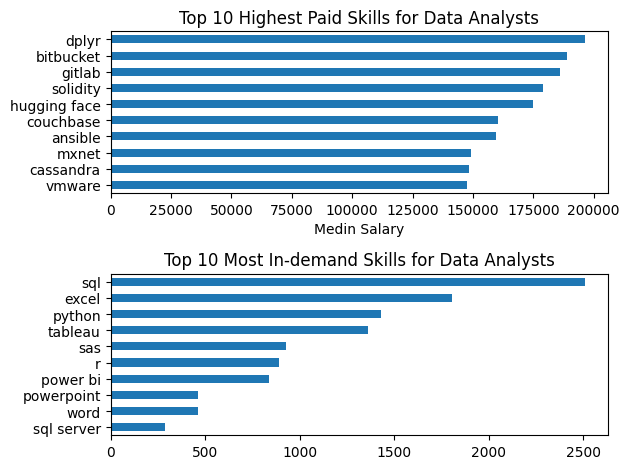

In [48]:
fig, ax = plt.subplots(2, 1)

df_top_paying.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('Medin Salary')

df_popular_skills.plot(kind='barh', y='count', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('')


ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.tight_layout()

